In [132]:
from google.colab import drive
drive.mount('/content/drive')

# Go into your Drive (optional: create a workspace folder)
%cd /content/drive/MyDrive
!mkdir -p brewery_project
%cd brewery_project


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
/content/drive/MyDrive/brewery_project


In [133]:
%cd /content
!rm -rf brewery-pipeline
!git clone https://github.com/ashmita-code/brewery-pipeline.git
%cd /content/brewery-pipeline/data-pipeline
!ls -la


/content
Cloning into 'brewery-pipeline'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 103 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 27.90 KiB | 1.64 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/brewery-pipeline/data-pipeline
total 24
drwxr-xr-x 3 root root 4096 Oct 13 19:57 .
drwxr-xr-x 4 root root 4096 Oct 13 19:57 ..
-rw-r--r-- 1 root root   62 Oct 13 19:57 .gitignore
-rw-r--r-- 1 root root  400 Oct 13 19:57 pyproject.toml
-rw-r--r-- 1 root root  143 Oct 13 19:57 README.md
drwxr-xr-x 2 root root 4096 Oct 13 19:57 src


In [134]:
%cd /content/brewery-pipeline/data-pipeline
!pwd
!ls -la    # you should see: pyproject.toml  README.md  .gitignore  src/


/content/brewery-pipeline/data-pipeline
/content/brewery-pipeline/data-pipeline
total 24
drwxr-xr-x 3 root root 4096 Oct 13 19:57 .
drwxr-xr-x 4 root root 4096 Oct 13 19:57 ..
-rw-r--r-- 1 root root   62 Oct 13 19:57 .gitignore
-rw-r--r-- 1 root root  400 Oct 13 19:57 pyproject.toml
-rw-r--r-- 1 root root  143 Oct 13 19:57 README.md
drwxr-xr-x 2 root root 4096 Oct 13 19:57 src


In [135]:
# core libs
!python -m pip install -q pyspark==3.5.2 click requests pytest

# install your project from THIS folder
!python -m pip install -q -e /content/brewery-pipeline/data-pipeline


  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for brewery-pipeline (pyproject.toml) ... done


In [136]:
# Run the full ingestion + enrichment pipeline
!breweries --run-all

# If that gives "command not found", use:
# !python -m src.cli --run-all


Traceback (most recent call last):
  File "/usr/local/bin/breweries", line 5, in <module>
    from src.cli import main
ModuleNotFoundError: No module named 'src'


In [137]:
%cd /content/brewery-pipeline/data-pipeline
!pwd


/content/brewery-pipeline/data-pipeline
/content/brewery-pipeline/data-pipeline


In [138]:
!python -m src.cli --run-all


[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 1, 'per_page': 200}
[INFO] Fetched page=1 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 2, 'per_page': 200}
[INFO] Fetched page=2 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 3, 'per_page': 200}
[INFO] Fetched page=3 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 4, 'per_page': 200}
[INFO] Fetched page=4 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 5, 'per_page': 200}
[INFO] Fetched page=5 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 6, 'per_page': 200}
[INFO] Fetched page=6 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 7, 'per_page': 200}
[INFO] Fetched page=7 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 8, 'per_page': 200}
[INFO] Fetched p

In [139]:
!apt-get install tree -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [140]:
!tree data -L 3


data
├── bronze
│   └── 1760385492
│       ├── data.raw
│       └── failed_requests.raw
├── gold
│   └── 1760385492
│       ├── part-00000-b5f80cb6-5527-4964-ad87-3b835a53c3bc-c000.snappy.parquet
│       └── _SUCCESS
└── silver
    └── 1760385492
        ├── country=Australia
        ├── country=Austria
        ├── country=England
        ├── country=France
        ├── country=Germany
        ├── country=Ireland
        ├── country=Isle of Man
        ├── country=Italy
        ├── country=Japan
        ├── country=Poland
        ├── country=Portugal
        ├── country=Scotland
        ├── country=Singapore
        ├── country=South Korea
        ├── country=Sweden
        ├── country=United States
        └── _SUCCESS

22 directories, 5 files


In [141]:
from pathlib import Path
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
latest_gold = sorted((Path("data")/"gold").iterdir())[-1]
df = spark.read.parquet(str(latest_gold))
df.show()
spark.stop()


+-----------+------------+-------------+
|    country|brewery_type|brewery_count|
+-----------+------------+-------------+
|  Australia|       large|           22|
|  Australia|       micro|          491|
|  Australia|    regional|            1|
|    Austria|         bar|            2|
|    Austria|     brewpub|            1|
|    Austria|       large|           10|
|    Austria|        nano|            2|
|    England|     brewpub|           10|
|    England|       large|            1|
|    England|       micro|           40|
|    England|     taproom|           11|
|     France|       micro|            3|
|    Germany|         bar|            5|
|    Germany|       large|            2|
|    Germany|     unknown|            3|
|    Ireland|     brewpub|            9|
|    Ireland|       large|            3|
|    Ireland|       micro|           49|
|    Ireland|    regional|            9|
|Isle of Man|       micro|            2|
+-----------+------------+-------------+
only showing top

In [142]:
from pathlib import Path
from pyspark.sql import SparkSession

# Recreate Spark session
spark = SparkSession.builder.appName("brewery-visual").getOrCreate()

# Locate the latest gold folder
latest_gold = sorted((Path("data")/"gold").iterdir())[-1]

# Load the Parquet data again
df = spark.read.parquet(str(latest_gold))

# Convert to Pandas for plotting
pdf = df.toPandas()
spark.stop()


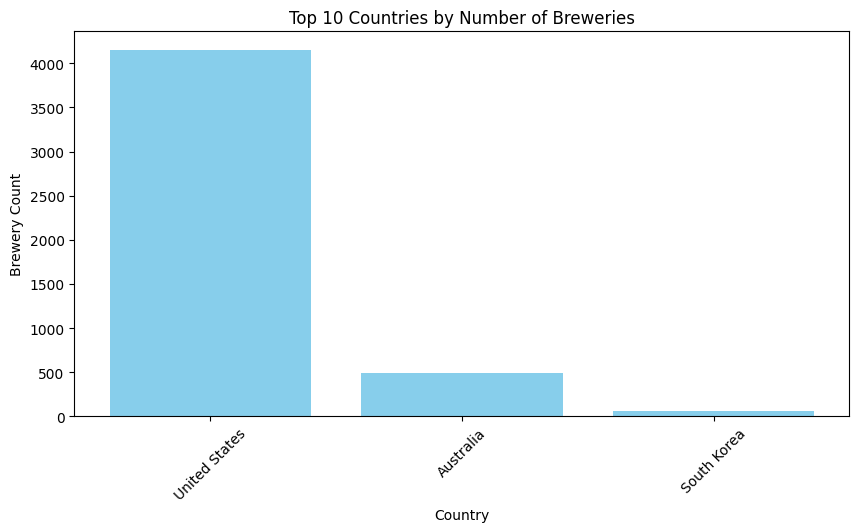

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

top = pdf.sort_values("brewery_count", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top["country"], top["brewery_count"], color="skyblue")
plt.title("Top 10 Countries by Number of Breweries")
plt.xlabel("Country")
plt.ylabel("Brewery Count")
plt.xticks(rotation=45)
plt.show()


In [144]:
!mkdir -p /content/drive/MyDrive/brewery_project/gold
!cp -r data/gold/* /content/drive/MyDrive/brewery_project/gold/


In [145]:
%cd /content/brewery-pipeline/data-pipeline
import os
os.environ["BREWERY_PER_PAGE"] = "200"   # ask API for 200 rows per page (max)
!python -m src.cli --run-all


/content/brewery-pipeline/data-pipeline
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 1, 'per_page': 200}
[INFO] Fetched page=1 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 2, 'per_page': 200}
[INFO] Fetched page=2 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 3, 'per_page': 200}
[INFO] Fetched page=3 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 4, 'per_page': 200}
[INFO] Fetched page=4 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 5, 'per_page': 200}
[INFO] Fetched page=5 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 6, 'per_page': 200}
[INFO] Fetched page=6 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'page': 7, 'per_page': 200}
[INFO] Fetched page=7 items=200
[INFO] HTTP GET https://api.openbrewerydb.org/v1/breweries params={'pag

In [146]:
from pathlib import Path
from pyspark.sql import SparkSession, functions as F
spark = SparkSession.builder.getOrCreate()
latest_gold = sorted((Path("data")/"gold").iterdir())[-1]
df = spark.read.parquet(str(latest_gold))
print("Total breweries:", df.agg(F.sum("brewery_count")).first()[0])
spark.stop()


Total breweries: 8923


In [147]:
# # === Export SILVER to a single CSV for Power BI ===
# from pathlib import Path
# from pyspark.sql import SparkSession

# spark = SparkSession.builder.appName("export-silver").getOrCreate()

# latest_silver = sorted((Path("data")/"silver").iterdir())[-1]
# df_s = spark.read.parquet(str(latest_silver))

# cols = [
#     "id","name","brewery_type","country","state_province","city",
#     "postal_code","address_1","phone","website_url","longitude","latitude"
# ]
# df_s = df_s.select(*cols)

# tmp = "/content/_silver_csv_tmp"
# out = "/content/drive/MyDrive/brewery_project/breweries_silver.csv"
# df_s.coalesce(1).write.mode("overwrite").option("header","true").csv(tmp)

# import glob, shutil, os
# part = glob.glob(tmp + "/part-*.csv")[0]
# os.makedirs("/content/drive/MyDrive/brewery_project", exist_ok=True)
# shutil.copy(part, out)

# print("Rows in SILVER:", df_s.count())
# print("Saved:", out)

# spark.stop()


In [148]:
# from pathlib import Path
# from pyspark.sql import SparkSession, functions as F
# import os, shutil, glob

# spark = SparkSession.builder.getOrCreate()

# latest_gold = sorted((Path("data")/"gold").iterdir())[-1]
# df_g = spark.read.parquet(str(latest_gold))

# # Write a clean CSV
# tmp = "/content/_gold_csv_tmp"
# out = "/content/drive/MyDrive/brewery_project/breweries_gold_summary.csv"
# df_g.coalesce(1).write.mode("overwrite").option("header","true").csv(tmp)

# # Copy to Drive with a nice name
# part = glob.glob(tmp + "/part-*.csv")[0]
# os.makedirs("/content/drive/MyDrive/brewery_project", exist_ok=True)
# shutil.copy(part, out)

# print("Gold summary saved to:", out)
# spark.stop()


In [149]:
# from pathlib import Path
# from pyspark.sql import SparkSession

# spark = SparkSession.builder.getOrCreate()
# gold = sorted((Path("data")/"gold").iterdir())[-1]
# df = spark.read.parquet(str(gold))
# df.toPandas().to_csv("/content/drive/MyDrive/brewery_project/brewery_gold.csv", index=False)
# spark.stop()


In [150]:
# from google.colab import files
# files.download("brewery_gold.csv")


In [209]:
# === Cell 1 — Setup Environment & Paths ===
!pip -q install duckdb

from pathlib import Path
from pyspark.sql import SparkSession
from google.colab import drive

# Mount Google Drive so DuckDB can save inside it
drive.mount('/content/drive')

# Project directory structure
PROJECT_DIR = Path("/content/brewery-pipeline/data-pipeline")
DATA_DIR = PROJECT_DIR / "data"

# Get the latest 'silver' and 'gold' folders dynamically
SILVER = sorted((DATA_DIR / "silver").iterdir())[-1]  # latest silver folder
GOLD   = sorted((DATA_DIR / "gold").iterdir())[-1]    # latest gold folder

# Path where your DuckDB warehouse file will live in Drive
DUCKDB_PATH = Path("/content/drive/MyDrive/brewery_project/warehouse.duckdb")

print("✅ Paths set up successfully:")
print("Silver:", SILVER)
print("Gold:", GOLD)
print("DuckDB file will be stored at:", DUCKDB_PATH)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Paths set up successfully:
Silver: /content/brewery-pipeline/data-pipeline/data/silver/1760385556
Gold: /content/brewery-pipeline/data-pipeline/data/gold/1760385556
DuckDB file will be stored at: /content/drive/MyDrive/brewery_project/warehouse.duckdb


In [219]:
# === Cell 2 (v2) — Auto-map GOLD columns + build Star Schema (NO city/state) ===
import os, duckdb
from pathlib import Path

# Prereqs: DUCKDB_PATH (Path or str) and GOLD (dir path) defined in a previous cell
TMP_DIR = "/content/duckdb_tmp"
os.makedirs(TMP_DIR, exist_ok=True)

con = duckdb.connect(Path(DUCKDB_PATH).as_posix())
con.execute(f"""
PRAGMA memory_limit='1GB';
PRAGMA temp_directory='{TMP_DIR}';
PRAGMA threads=2;
PRAGMA enable_progress_bar=true;
""")

# 1) Register GOLD (Parquet/CSV)
gold_dir = Path(GOLD)
parquet_files = list(gold_dir.rglob("*.parquet"))
csv_files     = list(gold_dir.rglob("*.csv"))

if parquet_files:
    con.execute(f"CREATE OR REPLACE VIEW gold_breweries AS SELECT * FROM read_parquet('{gold_dir}/**/*.parquet');")
elif csv_files:
    con.execute(f"""
        CREATE OR REPLACE VIEW gold_breweries AS
        SELECT * FROM read_csv_auto('{gold_dir}/**/*.csv', union_by_name=true, ignore_errors=true);
    """)
else:
    raise RuntimeError(f"No Parquet or CSV files found under: {gold_dir}")

# 2) Inspect available columns (PRAGMA table_info)
cols = [r[1].lower() for r in con.execute("PRAGMA table_info('gold_breweries');").fetchall()]

def pick(*cands):
    for c in cands:
        if c and c.lower() in cols:
            return c
    return None

# 3) Map likely column names (NO city/state)
col_id    = pick("id","brewery_id","obdb_id","breweryid")
col_name  = pick("name","brewery_name","brewery")
col_type  = pick("brewery_type","type")
col_cntry = pick("country","nation")
col_lat   = pick("latitude","lat")
col_lon   = pick("longitude","lon","lng")
col_upd   = pick("updated_at","last_updated","last_modified","updated","modified_at","created_at")

print("Column mapping (no city/state):")
print(dict(
    id=col_id, name=col_name, brewery_type=col_type,
    country=col_cntry, latitude=col_lat, longitude=col_lon, updated_at=col_upd
))

con.execute("CREATE SCHEMA IF NOT EXISTS star;")

# 4) Build staging with dynamic mapping; synthesize ID if missing (hash of name|country|type)
brewery_id_expr = (
    f"CAST({col_id} AS VARCHAR)"
    if col_id else
    "CAST(hash(lower(coalesce({n},'')) || '|' || coalesce({k},'') || '|' || coalesce({t},'')) AS VARCHAR)".format(
        n=col_name or "NULL", k=col_cntry or "NULL", t=col_type or "NULL"
    )
)

name_expr  = col_name or "NULL"
type_expr  = (f"COALESCE(NULLIF(TRIM({col_type}),''),'unknown')" if col_type else "'unknown'")
cntry_expr = (f"NULLIF(TRIM({col_cntry}), '')" if col_cntry else "NULL")
lat_expr   = (f"TRY_CAST({col_lat} AS DOUBLE)" if col_lat else "NULL")
lon_expr   = (f"TRY_CAST({col_lon} AS DOUBLE)" if col_lon else "NULL")
upd_expr   = (f"TRY_CAST({col_upd} AS TIMESTAMP)" if col_upd else "CURRENT_TIMESTAMP")

con.execute(f"""
CREATE OR REPLACE TABLE star.stg_brewery AS
SELECT
  {brewery_id_expr} AS brewery_id,
  {name_expr}       AS name,
  {type_expr}       AS brewery_type,
  {cntry_expr}      AS country,
  {lat_expr}        AS latitude,
  {lon_expr}        AS longitude,
  {upd_expr}        AS updated_at
FROM gold_breweries;
""")

# 5) Dimensions (country, brewery_type)
con.execute("""
CREATE OR REPLACE TABLE star.dim_country AS
SELECT ROW_NUMBER() OVER () AS country_key, country AS country_name
FROM (SELECT DISTINCT country FROM star.stg_brewery WHERE country IS NOT NULL);
""")

con.execute("""
CREATE OR REPLACE TABLE star.dim_brewery_type AS
SELECT ROW_NUMBER() OVER () AS brewery_type_key, brewery_type
FROM (SELECT DISTINCT brewery_type FROM star.stg_brewery);
""")

# 6) dim_brewery (NO city/state)
con.execute("""
CREATE OR REPLACE TABLE star.dim_brewery AS
SELECT
  ROW_NUMBER() OVER ()                AS brewery_key,
  s.brewery_id, s.name,
  c.country_key, t.brewery_type_key,
  s.latitude, s.longitude
FROM star.stg_brewery s
LEFT JOIN star.dim_country      c ON s.country      = c.country_name
LEFT JOIN star.dim_brewery_type t ON s.brewery_type = t.brewery_type;
""")

# 7) Date dimension (observed dates only)
con.execute("""
CREATE OR REPLACE TABLE star.dim_date AS
SELECT
  CAST(strftime('%Y%m%d', d) AS INT) AS date_key,
  d AS full_date,
  CAST(strftime('%Y', d) AS INT) AS year,
  CAST((CAST(strftime('%m', d) AS INT)+2)/3 AS INT) AS quarter,
  CAST(strftime('%m', d) AS INT) AS month,
  CAST(strftime('%d', d) AS INT) AS day,
  CAST(strftime('%w', d) AS INT) + CASE WHEN strftime('%w', d)='0' THEN 7 ELSE 0 END AS dow
FROM (
  SELECT DISTINCT CAST(updated_at AS DATE) AS d
  FROM star.stg_brewery
  WHERE updated_at IS NOT NULL
);
""")

# 8) Fact + detail (unchanged logic; now operates without city/state)
con.execute("""
CREATE OR REPLACE TABLE star.fact_brewery_counts AS
SELECT
  CAST(strftime('%Y%m%d', CAST(s.updated_at AS DATE)) AS INT) AS date_key,
  c.country_key,
  t.brewery_type_key,
  COUNT(*) AS brewery_count
FROM star.stg_brewery s
LEFT JOIN star.dim_country      c ON s.country      = c.country_name
LEFT JOIN star.dim_brewery_type t ON s.brewery_type = t.brewery_type
WHERE s.updated_at IS NOT NULL
GROUP BY 1,2,3;
""")

con.execute("""
CREATE OR REPLACE TABLE star.brewery_detail AS
SELECT s.*
FROM (
  SELECT *, ROW_NUMBER() OVER (PARTITION BY brewery_id ORDER BY updated_at DESC NULLS LAST) rn
  FROM star.stg_brewery
) s
WHERE rn = 1;
""")

# 9) Sanity counts
print(con.execute("""
SELECT 'stg_brewery' AS tbl, COUNT(*) AS rows FROM star.stg_brewery
UNION ALL SELECT 'dim_country', COUNT(*) FROM star.dim_country
UNION ALL SELECT 'dim_brewery_type', COUNT(*) FROM star.dim_brewery_type
UNION ALL SELECT 'dim_brewery', COUNT(*) FROM star.dim_brewery
UNION ALL SELECT 'dim_date', COUNT(*) FROM star.dim_date
UNION ALL SELECT 'fact_brewery_counts', COUNT(*) FROM star.fact_brewery_counts
UNION ALL SELECT 'brewery_detail', COUNT(*) FROM star.brewery_detail;
""").fetchdf())

con.close()
print(f"✅ Star schema (no city/state) built at {DUCKDB_PATH}.")


Column mapping (no city/state):
{'id': None, 'name': None, 'brewery_type': 'brewery_type', 'country': 'country', 'latitude': None, 'longitude': None, 'updated_at': None}
                   tbl  rows
0          stg_brewery    51
1          dim_country    16
2     dim_brewery_type    12
3          dim_brewery    51
4             dim_date     1
5  fact_brewery_counts    51
6       brewery_detail    51
✅ Star schema (no city/state) built at brewery.duckdb.


In [220]:
# === Patch — rebuild factless table with HUGEINT key + set-based insert (city/state-free) ===
import duckdb
from pathlib import Path

# assumes DUCKDB_PATH already defined earlier
con = duckdb.connect(Path(DUCKDB_PATH).as_posix())

# 1) Table DDL
con.execute("CREATE SCHEMA IF NOT EXISTS factless;")
con.execute("DROP TABLE IF EXISTS factless.fact_brewery_open;")
con.execute("""
CREATE TABLE factless.fact_brewery_open (
  date_key       INTEGER,   -- yyyymmdd
  h_brewery_key  HUGEINT    -- 128-bit key (we cast hash() up to HUGEINT)
);
""")

# 2) Insert rows for each day a brewery is "open" (first_seen .. last_seen), capped to ~3 years
#    Uses only fields present in star.stg_brewery: brewery_id, updated_at
con.execute("""
INSERT INTO factless.fact_brewery_open
WITH first_last AS (
  SELECT
    CAST(hash(CAST(brewery_id AS VARCHAR)) AS HUGEINT)         AS h_brewery_key,
    MIN(updated_at) FILTER (WHERE updated_at IS NOT NULL)      AS first_seen,
    MAX(updated_at) FILTER (WHERE updated_at IS NOT NULL)      AS last_seen
  FROM star.stg_brewery
  GROUP BY 1
),
cap_anchor AS (
  -- anchor = max observed date in stg (fallback: current_date)
  SELECT COALESCE(CAST(MAX(updated_at) AS DATE), CURRENT_DATE) AS max_obs_date
  FROM star.stg_brewery
),
caps AS (
  SELECT
    f.h_brewery_key,
    CAST(DATE_TRUNC('day', COALESCE(f.first_seen, CURRENT_DATE)) AS DATE) AS raw_start,
    CAST(DATE_TRUNC('day', COALESCE(f.last_seen,  CURRENT_DATE)) AS DATE) AS raw_end,
    CAST(a.max_obs_date - INTERVAL '1095 days' AS DATE)                  AS min_cap
  FROM first_last f
  CROSS JOIN cap_anchor a
),
bounds AS (
  SELECT
    h_brewery_key,
    CASE
      WHEN raw_start < min_cap THEN min_cap ELSE raw_start
    END AS start_date,
    raw_end AS end_date
  FROM caps
  WHERE raw_end IS NOT NULL
    AND raw_end >= CASE WHEN raw_start < min_cap THEN min_cap ELSE raw_start END
)
SELECT
  CAST(strftime('%Y%m%d', d) AS INTEGER) AS date_key,
  b.h_brewery_key
FROM bounds b,
     generate_series(b.start_date, b.end_date, INTERVAL 1 DAY) AS gs(d);
""")

# 3) Quick sanity
print(con.execute("SELECT COUNT(*) AS open_rows FROM factless.fact_brewery_open;").fetchdf())
print(con.execute("""
  SELECT * FROM factless.fact_brewery_open
  ORDER BY date_key DESC
  LIMIT 5;
""").fetchdf())

con.close()
print("✅ Rebuilt factless.fact_brewery_open with HUGEINT keys (3-year cap).")


   open_rows
0         51
   date_key  h_brewery_key
0  20251013   1.536249e+19
1  20251013   7.172241e+17
2  20251013   1.050694e+19
3  20251013   1.213103e+19
4  20251013   1.392450e+19
✅ Rebuilt factless.fact_brewery_open with HUGEINT keys (3-year cap).


In [221]:

  # === Cell 3C (final) — Geo Snowflake (schema-aware) + Bridges (HUGEINT) + Factless (HUGEINT) ===
import duckdb, pandas as pd
from pathlib import Path

con = duckdb.connect(Path(DUCKDB_PATH).as_posix())
con.execute("PRAGMA threads=2;")

# -------------------------------------------------------
# Helper: check if a column exists on a table (schema.tbl)
# -------------------------------------------------------
def has_col(schema: str, table: str, col: str) -> bool:
    return con.execute("""
        SELECT COUNT(*) > 0
        FROM information_schema.columns
        WHERE lower(table_schema)=lower(?) AND lower(table_name)=lower(?) AND lower(column_name)=lower(?);
    """, [schema, table, col]).fetchone()[0]

# ---------------------------------------------
# 1) GEO SNOWFLAKE (Country; State/City if exist)
# ---------------------------------------------
con.execute("CREATE SCHEMA IF NOT EXISTS geo_snowflake;")

# dim_country (always)
con.execute("""CREATE TABLE IF NOT EXISTS geo_snowflake.dim_country (
  country_key INTEGER, country_name VARCHAR
);""")
con.execute("DELETE FROM geo_snowflake.dim_country;")
con.execute("""
INSERT INTO geo_snowflake.dim_country
SELECT ROW_NUMBER() OVER () AS country_key, country
FROM (SELECT DISTINCT country FROM star.stg_brewery WHERE country IS NOT NULL AND country <> '');
""")

# dim_state (only if stg has 'state')
con.execute("""CREATE TABLE IF NOT EXISTS geo_snowflake.dim_state (
  state_key INTEGER, country_key INTEGER, state_name VARCHAR
);""")
con.execute("DELETE FROM geo_snowflake.dim_state;")
if has_col("star", "stg_brewery", "state"):
    con.execute("""
    INSERT INTO geo_snowflake.dim_state
    SELECT ROW_NUMBER() OVER () AS state_key, c.country_key, s.state
    FROM star.stg_brewery s
    JOIN geo_snowflake.dim_country c ON s.country = c.country_name
    WHERE s.state IS NOT NULL AND TRIM(CAST(s.state AS VARCHAR)) <> '';
    """)

# dim_city (only if stg has both 'state' and 'city')
con.execute("""CREATE TABLE IF NOT EXISTS geo_snowflake.dim_city (
  city_key INTEGER, state_key INTEGER, city_name VARCHAR
);""")
con.execute("DELETE FROM geo_snowflake.dim_city;")
if has_col("star", "stg_brewery", "state") and has_col("star", "stg_brewery", "city"):
    con.execute("""
    INSERT INTO geo_snowflake.dim_city
    SELECT ROW_NUMBER() OVER () AS city_key, st.state_key, s.city
    FROM star.stg_brewery s
    JOIN geo_snowflake.dim_country c ON s.country = c.country_name
    JOIN geo_snowflake.dim_state  st ON st.country_key = c.country_key AND st.state_name = s.state
    WHERE s.city IS NOT NULL AND TRIM(CAST(s.city AS VARCHAR)) <> '';
    """)

con.execute("CREATE SCHEMA IF NOT EXISTS mart;")
# If dim_state/city are empty, the view will just return 0 rows (fine).
con.execute("""
CREATE OR REPLACE VIEW mart.dim_geo_snowflake AS
SELECT c.country_key, c.country_name, st.state_key, st.state_name, ci.city_key, ci.city_name
FROM geo_snowflake.dim_city ci
JOIN geo_snowflake.dim_state   st ON ci.state_key = st.state_key
JOIN geo_snowflake.dim_country c  ON st.country_key = c.country_key;
""")

# ---------------------------------------------
# 2) BRIDGE TABLES (styles, channels) — HUGEINT keys
# ---------------------------------------------
con.execute("CREATE SCHEMA IF NOT EXISTS tags;")

# discover possible tag columns on gold_breweries
cols = [r[1].lower() for r in con.execute("PRAGMA table_info('gold_breweries');").fetchall()]
style_cols = [c for c in cols if c in ("styles","style","beer_styles","tags_styles")]
chan_cols  = [c for c in cols if c in ("distribution_channels","channels","dist_channels","tags_channels")]

con.execute("CREATE TABLE IF NOT EXISTS tags.dim_style(style_key INTEGER, style_name VARCHAR);")
con.execute("CREATE TABLE IF NOT EXISTS tags.dim_channel(channel_key INTEGER, channel_name VARCHAR);")
con.execute("CREATE TABLE IF NOT EXISTS tags.bridge_brewery_style(h_brewery_key HUGEINT, style_key INTEGER);")
con.execute("CREATE TABLE IF NOT EXISTS tags.bridge_brewery_channel(h_brewery_key HUGEINT, channel_key INTEGER);")

def load_bridge(list_col_candidates, dim_table, bridge_table, dim_key, dim_name, alias):
    if not list_col_candidates:
        return
    list_col = list_col_candidates[0]

    # Explode delimited lists (commas/semicolons/pipes) -> rows
    con.execute(f"""
    CREATE OR REPLACE TEMP VIEW _exploded_{alias} AS
    SELECT
      g.name,
      COALESCE(TRIM(x), '') AS item,
      s.brewery_id
    FROM (
      SELECT name,
             regexp_split_to_array(COALESCE(CAST({list_col} AS VARCHAR),''), '\\s*[,;|]\\s*') AS arr
      FROM gold_breweries
      WHERE {list_col} IS NOT NULL AND CAST({list_col} AS VARCHAR) <> ''
    ) g
    LEFT JOIN star.stg_brewery s ON s.name = g.name
    , UNNEST(g.arr) AS x
    WHERE TRIM(x) <> '';
    """)

    # Rebuild dim
    con.execute(f"DELETE FROM {dim_table};")
    con.execute(f"""
    INSERT INTO {dim_table}
    SELECT ROW_NUMBER() OVER () AS {dim_key}, LOWER(item) AS {dim_name}
    FROM (SELECT DISTINCT item FROM _exploded_{alias} WHERE item <> '');
    """)

    # Bridge: use hashed HUGEINT from brewery_id if present; else hash of lower(name)
    con.execute(f"""
    INSERT INTO {bridge_table}
    SELECT DISTINCT
      CAST(
        CASE
          WHEN brewery_id IS NOT NULL THEN hash(CAST(brewery_id AS VARCHAR))
          ELSE hash(LOWER(COALESCE(name,'')))
        END
      AS HUGEINT) AS h_brewery_key,
      d.{dim_key}
    FROM _exploded_{alias} e
    JOIN {dim_table} d ON d.{dim_name} = LOWER(e.item);
    """)

load_bridge(style_cols, "tags.dim_style", "tags.bridge_brewery_style", "style_key", "style_name", "style")
load_bridge(chan_cols,  "tags.dim_channel", "tags.bridge_brewery_channel", "channel_key", "channel_name", "chan")

# ---------------------------------------------
# 3) FACTLESS FACT — brewery open on date (HUGEINT + 3-yr cap)
# ---------------------------------------------
con.execute("CREATE SCHEMA IF NOT EXISTS factless;")
con.execute("DROP TABLE IF EXISTS factless.fact_brewery_open;")
con.execute("""
CREATE TABLE factless.fact_brewery_open (
  date_key       INTEGER,   -- yyyymmdd
  h_brewery_key  HUGEINT
);
""")

con.execute("""
INSERT INTO factless.fact_brewery_open
WITH first_last AS (
  SELECT
    CAST(hash(CAST(brewery_id AS VARCHAR)) AS HUGEINT) AS h_brewery_key,
    MIN(updated_at) FILTER (WHERE updated_at IS NOT NULL) AS first_seen,
    MAX(updated_at) FILTER (WHERE updated_at IS NOT NULL) AS last_seen
  FROM star.stg_brewery
  GROUP BY 1
),
cap_anchor AS (
  SELECT COALESCE(CAST(MAX(updated_at) AS DATE), CURRENT_DATE) AS max_obs_date
  FROM star.stg_brewery
),
caps AS (
  SELECT
    f.h_brewery_key,
    CAST(DATE_TRUNC('day', COALESCE(f.first_seen, CURRENT_DATE)) AS DATE) AS raw_start,
    CAST(DATE_TRUNC('day', COALESCE(f.last_seen,  CURRENT_DATE)) AS DATE) AS raw_end,
    CAST(a.max_obs_date - INTERVAL '1095 days' AS DATE) AS min_cap
  FROM first_last f
  CROSS JOIN cap_anchor a
),
bounds AS (
  SELECT
    h_brewery_key,
    CASE WHEN raw_start < min_cap THEN min_cap ELSE raw_start END AS start_date,
    raw_end AS end_date
  FROM caps
  WHERE raw_end IS NOT NULL
    AND raw_end >= CASE WHEN raw_start < min_cap THEN min_cap ELSE raw_start END
)
SELECT
  CAST(strftime('%Y%m%d', d) AS INTEGER) AS date_key,
  b.h_brewery_key
FROM bounds b,
     generate_series(b.start_date, b.end_date, INTERVAL 1 DAY) AS gs(d);
""")

# ---------------------------------------------
# Checks / quick prints
# ---------------------------------------------
print("Geo snowflake counts:")
print(con.execute("""
SELECT 'country', COUNT(*) FROM geo_snowflake.dim_country
UNION ALL SELECT 'state', COUNT(*) FROM geo_snowflake.dim_state
UNION ALL SELECT 'city', COUNT(*) FROM geo_snowflake.dim_city;
""").fetchdf())

print("\nBridge counts (0 is fine if your GOLD lacks those columns):")
print(con.execute("""
SELECT 'style_dim', COUNT(*) FROM tags.dim_style
UNION ALL SELECT 'channel_dim', COUNT(*) FROM tags.dim_channel
UNION ALL SELECT 'bridge_style', COUNT(*) FROM tags.bridge_brewery_style
UNION ALL SELECT 'bridge_channel', COUNT(*) FROM tags.bridge_brewery_channel;
""").fetchdf())

print("\nFactless sample:")
print(con.execute("SELECT * FROM factless.fact_brewery_open ORDER BY date_key DESC LIMIT 5;").fetchdf())

con.close()
print("✅ Geo snowflake (schema-aware), tag bridges (HUGEINT), and factless (HUGEINT) built.")


Geo snowflake counts:
  'country'  count_star()
0   country            16
1     state             0
2      city             0

Bridge counts (0 is fine if your GOLD lacks those columns):
      'style_dim'  count_star()
0       style_dim             0
1     channel_dim             0
2    bridge_style             0
3  bridge_channel             0

Factless sample:
   date_key  h_brewery_key
0  20251013   4.018833e+18
1  20251013   5.132460e+18
2  20251013   1.159382e+19
3  20251013   1.119342e+19
4  20251013   3.712493e+18
✅ Geo snowflake (schema-aware), tag bridges (HUGEINT), and factless (HUGEINT) built.


In [222]:
# === Inspect your DuckDB warehouse ===
import duckdb
con = duckdb.connect(DUCKDB_PATH.as_posix())

# 1) List all schemas
print("📂 Schemas:")
print(con.execute("SELECT DISTINCT table_schema AS schema FROM information_schema.tables ORDER BY 1;").fetchdf())

# 2) List tables per schema (focus on the ones you created)
for schema in ["star", "geo_snowflake", "tags", "factless", "mart"]:
    print(f"\n📊 Tables in schema: {schema}")
    df = con.execute(f"""
        SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = '{schema}'
        ORDER BY table_name;
    """).fetchdf()
    print(df if not df.empty else "(none)")

# 3) See columns for a specific table
def describe(table):
    print(f"\n🧾 Columns in {table}:")
    print(con.execute(f"PRAGMA table_info('{table}');").fetchdf())

# examples:
describe("star.fact_brewery_counts")
describe("geo_snowflake.dim_country")
describe("factless.fact_brewery_open")

# 4) Peek first rows (change tables as you like)
print("\n🔎 Sample rows:")
print(con.execute("SELECT * FROM star.fact_brewery_counts LIMIT 10;").fetchdf())
print(con.execute("SELECT * FROM factless.fact_brewery_open LIMIT 10;").fetchdf())

con.close()


📂 Schemas:
          schema
0       factless
1  geo_snowflake
2           main
3           mart
4           star
5           tags

📊 Tables in schema: star
            table_name
0       brewery_detail
1          dim_brewery
2     dim_brewery_type
3          dim_country
4             dim_date
5  fact_brewery_counts
6          stg_brewery

📊 Tables in schema: geo_snowflake
    table_name
0     dim_city
1  dim_country
2    dim_state

📊 Tables in schema: tags
               table_name
0  bridge_brewery_channel
1    bridge_brewery_style
2             dim_channel
3               dim_style

📊 Tables in schema: factless
          table_name
0  fact_brewery_open

📊 Tables in schema: mart
          table_name
0  dim_geo_snowflake

🧾 Columns in star.fact_brewery_counts:
   cid              name     type  notnull dflt_value     pk
0    0          date_key  INTEGER    False       None  False
1    1       country_key   BIGINT    False       None  False
2    2  brewery_type_key   BIGINT    False    

In [223]:
import duckdb
import pandas as pd
from pathlib import Path

con = duckdb.connect(Path(DUCKDB_PATH).as_posix())

# List all tables from your main analytics schemas
tables = con.execute("""
SELECT table_schema, table_name
FROM information_schema.tables
WHERE table_schema IN ('star','geo_snowflake','tags','factless','mart')
ORDER BY table_schema, table_name;
""").fetchall()

rows = []
for schema, name in tables:
    try:
        cnt = con.execute(f'SELECT COUNT(*) FROM "{schema}"."{name}"').fetchone()[0]
        rows.append((schema, name, cnt))
    except Exception as e:
        rows.append((schema, name, f"error: {str(e)}"))

con.close()

df = (
    pd.DataFrame(rows, columns=["schema","table","rows"])
      .sort_values(["schema","table"])
      .reset_index(drop=True)
)
print(df.to_string(index=False))


       schema                  table  rows
     factless      fact_brewery_open    51
geo_snowflake               dim_city     0
geo_snowflake            dim_country    16
geo_snowflake              dim_state     0
         mart      dim_geo_snowflake     0
         star         brewery_detail    51
         star            dim_brewery    51
         star       dim_brewery_type    12
         star            dim_country    16
         star               dim_date     1
         star    fact_brewery_counts    51
         star            stg_brewery    51
         tags bridge_brewery_channel     0
         tags   bridge_brewery_style     0
         tags            dim_channel     0
         tags              dim_style     0


=== Table Counts ===


,table_name,rows
0,brewery_detail,51
1,dim_brewery,51
2,dim_brewery_type,12
3,dim_country,16
4,dim_date,1
5,fact_brewery_counts,51
6,stg_brewery,51



=== DQ Results ===


,test_name,failed_rows,status,note
0,fact_orphan_brewery_type,0,PASS,brewery_type_key in fact must exist in dim_bre...
1,fact_orphan_country,0,PASS,country_key in fact must exist in dim_country
2,stg_null_country,0,PASS,country must be non-null/non-empty


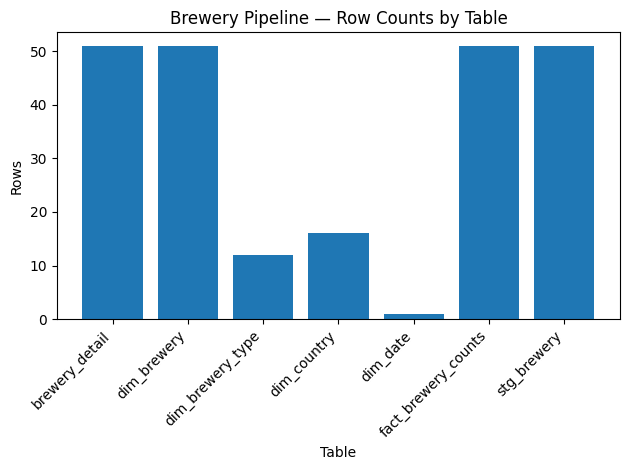

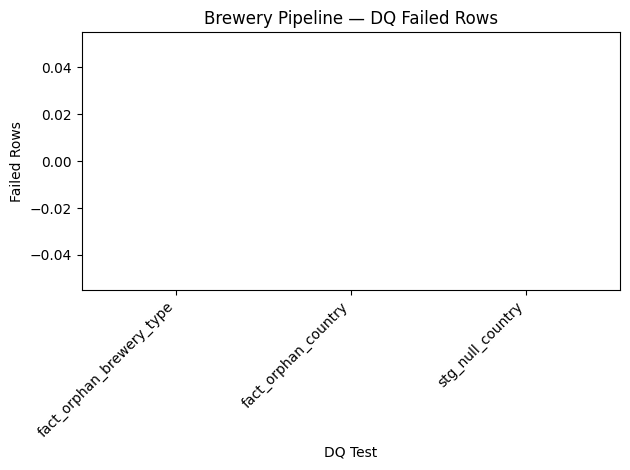


Saved files:
/content/brewery_audit_20251013_212444.xlsx
/content/table_counts_20251013_212444.csv
/content/dq_results_20251013_212444.csv
/content/table_counts_bar_20251013_212444.png
/content/dq_failed_rows_bar_20251013_212444.png


In [224]:
# AUDIT & DQ (Python + DuckDB + Matplotlib) — city/state removed
import sys, subprocess
try:
    import duckdb  # noqa
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "duckdb", "pandas", "matplotlib", "-q"])

import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone
from pathlib import Path

# --- Config ---
DUCKDB_PATH = Path("brewery.duckdb")   # change if your DB file has a different name
OUTDIR = Path("/content") if Path("/content").exists() else Path(".")
OUTDIR.mkdir(parents=True, exist_ok=True)
ts = datetime.now(timezone.utc).strftime("%Y%m%d_%H%M%S")

con = duckdb.connect(DUCKDB_PATH.as_posix())
# --- FIX: if stg_brewery is missing, alias it to brewery_detail ---
has_stg = con.execute("""
  SELECT COUNT(*)>0
  FROM information_schema.tables
  WHERE table_schema='star' AND table_name='stg_brewery';
""").fetchone()[0]

if not has_stg:
    has_detail = con.execute("""
      SELECT COUNT(*)>0
      FROM information_schema.tables
      WHERE table_schema='star' AND table_name='brewery_detail';
    """).fetchone()[0]
    if has_detail:
        con.execute("""
          CREATE OR REPLACE VIEW star.stg_brewery AS
          SELECT * FROM star.brewery_detail;
        """)
        print("✅ Created a temporary view star.stg_brewery → brewery_detail")
    else:
        raise RuntimeError("No table named stg_brewery or brewery_detail found.")


# 1) Row-count reconciliation (stg -> star dims/facts)
counts_df = con.execute("""
WITH c AS (
  SELECT 'stg_brewery' AS table_name, COUNT(*) AS rows FROM star.stg_brewery
  UNION ALL SELECT 'dim_country', COUNT(*) FROM star.dim_country
  UNION ALL SELECT 'dim_brewery_type', COUNT(*) FROM star.dim_brewery_type
  UNION ALL SELECT 'dim_brewery', COUNT(*) FROM star.dim_brewery
  UNION ALL SELECT 'dim_date', COUNT(*) FROM star.dim_date
  UNION ALL SELECT 'fact_brewery_counts', COUNT(*) FROM star.fact_brewery_counts
  UNION ALL SELECT 'brewery_detail', COUNT(*) FROM star.brewery_detail
)
SELECT * FROM c ORDER BY table_name;
""").fetchdf()

# 2) DQ: null/blank checks on staging (country only)
dq_nulls = con.execute("""
SELECT
  SUM(CASE WHEN country IS NULL OR TRIM(CAST(country AS VARCHAR)) = '' THEN 1 ELSE 0 END) AS null_country
FROM star.stg_brewery;
""").fetchdf()

# 3) DQ: orphan FK checks in fact_brewery_counts
dq_orphans = con.execute("""
WITH orph_country AS (
  SELECT COUNT(*) AS cnt
  FROM star.fact_brewery_counts f
  LEFT JOIN star.dim_country dc ON f.country_key = dc.country_key
  WHERE dc.country_key IS NULL
),
orph_type AS (
  SELECT COUNT(*) AS cnt
  FROM star.fact_brewery_counts f
  LEFT JOIN star.dim_brewery_type dt ON f.brewery_type_key = dt.brewery_type_key
  WHERE dt.brewery_type_key IS NULL
)
SELECT (SELECT cnt FROM orph_country) AS orphan_country,
       (SELECT cnt FROM orph_type)    AS orphan_brewery_type;
""").fetchdf()

# 4) Human-friendly DQ summary table (no state/city tests)
tests = [
    {
        "test_name": "stg_null_country",
        "failed_rows": int(dq_nulls.loc[0, "null_country"]),
        "status": "PASS" if int(dq_nulls.loc[0, "null_country"]) == 0 else "FAIL",
        "note": "country must be non-null/non-empty"
    },
    {
        "test_name": "fact_orphan_country",
        "failed_rows": int(dq_orphans.loc[0, "orphan_country"]),
        "status": "PASS" if int(dq_orphans.loc[0, "orphan_country"]) == 0 else "FAIL",
        "note": "country_key in fact must exist in dim_country"
    },
    {
        "test_name": "fact_orphan_brewery_type",
        "failed_rows": int(dq_orphans.loc[0, "orphan_brewery_type"]),
        "status": "PASS" if int(dq_orphans.loc[0, "orphan_brewery_type"]) == 0 else "FAIL",
        "note": "brewery_type_key in fact must exist in dim_brewery_type"
    },
]
dq_df = pd.DataFrame(tests).sort_values(["status", "test_name"], ascending=[True, True]).reset_index(drop=True)

# 5) Save artifacts
excel_path   = OUTDIR / f"brewery_audit_{ts}.xlsx"
counts_csv   = OUTDIR / f"table_counts_{ts}.csv"
dq_csv       = OUTDIR / f"dq_results_{ts}.csv"
counts_png   = OUTDIR / f"table_counts_bar_{ts}.png"
dq_png       = OUTDIR / f"dq_failed_rows_bar_{ts}.png"

with pd.ExcelWriter(excel_path) as xw:
    counts_df.to_excel(xw, sheet_name="table_counts", index=False)
    dq_df.to_excel(xw, sheet_name="dq_results", index=False)

counts_df.to_csv(counts_csv, index=False)
dq_df.to_csv(dq_csv, index=False)

# 6) Display tables
print("=== Table Counts ===")
display(counts_df)
print("\n=== DQ Results ===")
display(dq_df)

# 7) Charts (one plot each; no custom colors/styles)
plt.figure()
plt.bar(counts_df["table_name"], counts_df["rows"])
plt.xticks(rotation=45, ha='right')
plt.title("Brewery Pipeline — Row Counts by Table")
plt.xlabel("Table")
plt.ylabel("Rows")
plt.tight_layout()
plt.savefig(counts_png, dpi=150)
plt.show()

plt.figure()
plt.bar(dq_df["test_name"], dq_df["failed_rows"])
plt.xticks(rotation=45, ha='right')
plt.title("Brewery Pipeline — DQ Failed Rows")
plt.xlabel("DQ Test")
plt.ylabel("Failed Rows")
plt.tight_layout()
plt.savefig(dq_png, dpi=150)
plt.show()

con.close()

print("\nSaved files:")
print(excel_path)
print(counts_csv)
print(dq_csv)
print(counts_png)
print(dq_png)


In [227]:
# --- Run these queries via DuckDB in Python ---
import duckdb
from pathlib import Path

DUCKDB_PATH = Path("brewery.duckdb")
con = duckdb.connect(DUCKDB_PATH.as_posix())

def show(title, query):
    print(f"\n--- {title} ---")
    print(con.execute(query).fetchdf())

# 1) stg size
show("staging row count",
     "SELECT COUNT(*) AS n_rows FROM star.stg_brewery;")

# 2) raw gold view (only if it exists)
exists_gold = con.execute("""
SELECT COUNT(*)>0 AS exists
FROM information_schema.tables
WHERE table_schema = 'main' AND table_name = 'gold_breweries';
""").fetchone()[0]

if exists_gold:
    show("gold_breweries row count",
         "SELECT COUNT(*) AS n_rows FROM gold_breweries;")

# 3) distinct dates present
show("distinct updated_at dates",
     "SELECT COUNT(DISTINCT CAST(updated_at AS DATE)) AS n_dates FROM star.stg_brewery;")

# 4) countries and types present (top 10 each)
show("rows by country (top 10)",
     "SELECT country, COUNT(*) AS n FROM star.stg_brewery GROUP BY 1 ORDER BY n DESC LIMIT 10;")

show("rows by brewery_type (top 10)",
     "SELECT brewery_type, COUNT(*) AS n FROM star.stg_brewery GROUP BY 1 ORDER BY n DESC LIMIT 10;")

con.close()



--- staging row count ---
   n_rows
0      51

--- gold_breweries row count ---
   n_rows
0      51

--- distinct updated_at dates ---
   n_dates
0        1

--- rows by country (top 10) ---
         country   n
0  United States  12
1        Ireland   4
2          Italy   4
3        Austria   4
4        England   4
5         Poland   3
6      Australia   3
7        Germany   3
8      Singapore   3
9       Portugal   2

--- rows by brewery_type (top 10) ---
  brewery_type   n
0        micro  13
1      brewpub   9
2        large   8
3     regional   5
4          bar   4
5         nano   3
6      taproom   2
7       closed   2
8      unknown   2
9   proprietor   1


In [228]:
import duckdb, pandas as pd
from pathlib import Path

DUCKDB_PATH = Path("brewery.duckdb")
con = duckdb.connect(DUCKDB_PATH.as_posix())

# check schema
print("🧾 Columns:")
print(con.execute("PRAGMA table_info('star.fact_brewery_counts');").fetchdf())

# preview data
print("\n🔎 Sample rows:")
df_fact = con.execute("""
SELECT f.*, c.country_name, t.brewery_type
FROM star.fact_brewery_counts f
LEFT JOIN star.dim_country c ON f.country_key = c.country_key
LEFT JOIN star.dim_brewery_type t ON f.brewery_type_key = t.brewery_type_key
ORDER BY f.date_key DESC

""").fetchdf()

pd.set_option("display.max_columns", None)
display(df_fact)
con.close()


🧾 Columns:
   cid              name     type  notnull dflt_value     pk
0    0          date_key  INTEGER    False       None  False
1    1       country_key   BIGINT    False       None  False
2    2  brewery_type_key   BIGINT    False       None  False
3    3     brewery_count   BIGINT    False       None  False

🔎 Sample rows:


,date_key,country_key,brewery_type_key,brewery_count,country_name,brewery_type
0,20251013,1,6,1,France,micro
1,20251013,3,6,1,Japan,micro
2,20251013,4,7,1,Poland,regional
3,20251013,8,9,1,Austria,nano
4,20251013,9,3,1,England,taproom
5,20251013,11,7,1,Ireland,regional
6,20251013,14,1,1,Singapore,large
7,20251013,16,10,1,United States,unknown
8,20251013,5,8,1,Portugal,brewpub
9,20251013,6,8,1,South Korea,brewpub


In [208]:
# === ETL Lineage + Volume Sankey (FAANG-style) ===
import duckdb, pandas as pd
import plotly.graph_objects as go
from pathlib import Path

DUCKDB_PATH = Path("brewery.duckdb")
con = duckdb.connect(DUCKDB_PATH.as_posix())

# ensure stg exists (alias to brewery_detail if needed)
has_stg = con.execute("""
  SELECT COUNT(*)>0
  FROM information_schema.tables
  WHERE table_schema='star' AND table_name='stg_brewery';
""").fetchone()[0]
if not has_stg:
    has_detail = con.execute("""
      SELECT COUNT(*)>0
      FROM information_schema.tables
      WHERE table_schema='star' AND table_name='brewery_detail';
    """).fetchone()[0]
    if has_detail:
        con.execute("CREATE OR REPLACE VIEW star.stg_brewery AS SELECT * FROM star.brewery_detail;")

# volumes
raw_rows       = con.execute("SELECT COUNT(*) FROM star.stg_brewery;").fetchone()[0]
dedup_rows     = con.execute("SELECT COUNT(*) FROM star.brewery_detail;").fetchone()[0]
dim_brewery    = con.execute("SELECT COUNT(*) FROM star.dim_brewery;").fetchone()[0]
dim_country    = con.execute("SELECT COUNT(*) FROM star.dim_country;").fetchone()[0]
dim_type       = con.execute("SELECT COUNT(*) FROM star.dim_brewery_type;").fetchone()[0]
fact_rows      = con.execute("SELECT COUNT(*) FROM star.fact_brewery_counts;").fetchone()[0]

# simple DQ
null_country = con.execute("""
SELECT COALESCE(SUM(CASE WHEN country IS NULL OR TRIM(CAST(country AS VARCHAR))='' THEN 1 ELSE 0 END),0)
FROM star.stg_brewery;
""").fetchone()[0]

orphan_country, orphan_type = con.execute("""
WITH oc AS (
  SELECT COUNT(*) AS cnt
  FROM star.fact_brewery_counts f
  LEFT JOIN star.dim_country dc ON f.country_key = dc.country_key
  WHERE dc.country_key IS NULL
),
ot AS (
  SELECT COUNT(*) AS cnt
  FROM star.fact_brewery_counts f
  LEFT JOIN star.dim_brewery_type dt ON f.brewery_type_key = dt.brewery_type_key
  WHERE dt.brewery_type_key IS NULL
)
SELECT (SELECT cnt FROM oc), (SELECT cnt FROM ot);
""").fetchone()

con.close()

# nodes
labels = [
    "Staging (stg_brewery)",
    "DQ: Missing Country",
    "Clean Latest (brewery_detail)",
    "Dim Brewery",
    "Dim Country",
    "Dim Type",
    "Fact (fact_brewery_counts)"
]
# color hinting
colors = ["#4E79A7","#E15759","#59A14F","#9C755F","#76B7B2","#F28E2B","#B07AA1"]

# links (source -> target -> value)
# We split staging into clean vs dropped (DQ), then show lineage to dims and fact.
sources = []
targets = []
values  = []
link_colors = []

def add(s,t,v,c):
    if v and v > 0:
        sources.append(s); targets.append(t); values.append(int(v)); link_colors.append(c)

# 0: Staging
add(0, 1, null_country,          "rgba(225,87,89,0.6)")   # DQ drop
add(0, 2, max(raw_rows - null_country, 0), "rgba(78,121,167,0.55)")  # kept to clean latest

# 2: Clean latest to dims/fact
add(2, 3, dim_brewery,           "rgba(156,117,95,0.55)")
add(2, 4, dim_country,           "rgba(118,183,178,0.55)")
add(2, 5, dim_type,              "rgba(242,142,43,0.55)")
add(2, 6, fact_rows,             "rgba(176,122,161,0.7)")

# fact orphans (shown as small side flow)
add(6, 4, orphan_country,        "rgba(225,87,89,0.35)")
add(6, 5, orphan_type,           "rgba(225,87,89,0.35)")

fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=18,
        thickness=18,
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors,
        hovertemplate="<b>%{source.label}</b> → <b>%{target.label}</b><br>Rows: %{value:,}<extra></extra>"
    )
))

fig.update_layout(
    title="ETL Lineage & Volume — Staging → Clean → Dims → Fact (with DQ losses)",
    font=dict(size=12)
)
fig.show()
